## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.083755  0.763149  1.159631  0.767363 -0.480142  0.088458
1 -0.500169 -0.969956  0.015801  1.204292 -0.625446 -0.431635
2  0.132504  0.217656 -0.499503  0.519376 -0.794216  0.409725
3 -0.601341  1.036187  0.250797  0.863195 -0.288490  0.468530
4 -0.300100 -0.094106  0.601495  0.992661 -1.357853  0.061604


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9489087	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9416225	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9340985	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9263894	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9185900	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9096391	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9019761	total: 72ms	remaining: 10.2s
7:	learn: 0.8956763	total: 72.5ms	remaining: 8.99s
8:	learn: 0.8883972	total: 73.1ms	remaining: 8.05s
9:	learn: 0.8803103	total: 73.7ms	remaining: 7.29s
10:	learn: 0.8718331	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8647292	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8567415	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8502799	total: 76ms	remaining: 5.35s
14:	learn: 0.8435412	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8376875	total: 77ms	remaining: 4.74s
16:	learn: 0.8304067	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8238754	total: 78ms	remaining: 4.26s
18:	learn: 0.8167292	total: 78.5ms	remaining: 4.05s


87:	learn: 0.4741191	total: 109ms	remaining: 1.13s
88:	learn: 0.4705333	total: 109ms	remaining: 1.12s
89:	learn: 0.4668536	total: 110ms	remaining: 1.11s
90:	learn: 0.4638699	total: 110ms	remaining: 1.1s
91:	learn: 0.4607158	total: 111ms	remaining: 1.09s
92:	learn: 0.4573063	total: 111ms	remaining: 1.08s
93:	learn: 0.4540873	total: 112ms	remaining: 1.08s
94:	learn: 0.4504075	total: 112ms	remaining: 1.07s
95:	learn: 0.4467188	total: 113ms	remaining: 1.06s
96:	learn: 0.4424325	total: 113ms	remaining: 1.05s
97:	learn: 0.4391072	total: 114ms	remaining: 1.04s
98:	learn: 0.4356333	total: 114ms	remaining: 1.04s
99:	learn: 0.4317067	total: 114ms	remaining: 1.03s
100:	learn: 0.4287699	total: 115ms	remaining: 1.02s
101:	learn: 0.4258482	total: 115ms	remaining: 1.01s
102:	learn: 0.4228935	total: 116ms	remaining: 1.01s
103:	learn: 0.4200710	total: 116ms	remaining: 1s
104:	learn: 0.4170493	total: 117ms	remaining: 993ms
105:	learn: 0.4141769	total: 117ms	remaining: 987ms
106:	learn: 0.4113390	total: 

250:	learn: 0.1512071	total: 187ms	remaining: 559ms
251:	learn: 0.1502240	total: 188ms	remaining: 557ms
252:	learn: 0.1492856	total: 188ms	remaining: 556ms
253:	learn: 0.1483292	total: 189ms	remaining: 554ms
254:	learn: 0.1473775	total: 189ms	remaining: 552ms
255:	learn: 0.1463683	total: 190ms	remaining: 551ms
256:	learn: 0.1453721	total: 190ms	remaining: 549ms
257:	learn: 0.1446374	total: 190ms	remaining: 548ms
258:	learn: 0.1438768	total: 191ms	remaining: 546ms
259:	learn: 0.1429751	total: 191ms	remaining: 544ms
260:	learn: 0.1420753	total: 191ms	remaining: 542ms
261:	learn: 0.1415388	total: 192ms	remaining: 541ms
262:	learn: 0.1404749	total: 192ms	remaining: 539ms
263:	learn: 0.1399248	total: 193ms	remaining: 537ms
264:	learn: 0.1389618	total: 193ms	remaining: 536ms
265:	learn: 0.1379048	total: 194ms	remaining: 534ms
266:	learn: 0.1369155	total: 194ms	remaining: 533ms
267:	learn: 0.1361145	total: 195ms	remaining: 531ms
268:	learn: 0.1350553	total: 195ms	remaining: 530ms
269:	learn: 

479:	learn: 0.0522618	total: 292ms	remaining: 316ms
480:	learn: 0.0520309	total: 292ms	remaining: 316ms
481:	learn: 0.0518045	total: 293ms	remaining: 315ms
482:	learn: 0.0514763	total: 293ms	remaining: 314ms
483:	learn: 0.0512573	total: 294ms	remaining: 313ms
484:	learn: 0.0509531	total: 294ms	remaining: 313ms
485:	learn: 0.0507426	total: 295ms	remaining: 312ms
486:	learn: 0.0504783	total: 295ms	remaining: 311ms
487:	learn: 0.0504171	total: 295ms	remaining: 310ms
488:	learn: 0.0501338	total: 296ms	remaining: 309ms
489:	learn: 0.0500742	total: 297ms	remaining: 309ms
490:	learn: 0.0498679	total: 297ms	remaining: 308ms
491:	learn: 0.0496199	total: 298ms	remaining: 307ms
492:	learn: 0.0494187	total: 298ms	remaining: 307ms
493:	learn: 0.0492212	total: 299ms	remaining: 306ms
494:	learn: 0.0490274	total: 299ms	remaining: 305ms
495:	learn: 0.0487994	total: 300ms	remaining: 304ms
496:	learn: 0.0485354	total: 300ms	remaining: 304ms
497:	learn: 0.0483141	total: 301ms	remaining: 303ms
498:	learn: 

646:	learn: 0.0241391	total: 371ms	remaining: 202ms
647:	learn: 0.0240045	total: 371ms	remaining: 202ms
648:	learn: 0.0238852	total: 372ms	remaining: 201ms
649:	learn: 0.0237460	total: 372ms	remaining: 201ms
650:	learn: 0.0235923	total: 373ms	remaining: 200ms
651:	learn: 0.0234774	total: 373ms	remaining: 199ms
652:	learn: 0.0233325	total: 374ms	remaining: 199ms
653:	learn: 0.0232571	total: 374ms	remaining: 198ms
654:	learn: 0.0231159	total: 375ms	remaining: 197ms
655:	learn: 0.0229725	total: 375ms	remaining: 197ms
656:	learn: 0.0228993	total: 376ms	remaining: 196ms
657:	learn: 0.0227904	total: 376ms	remaining: 196ms
658:	learn: 0.0227188	total: 377ms	remaining: 195ms
659:	learn: 0.0225835	total: 377ms	remaining: 194ms
660:	learn: 0.0224422	total: 377ms	remaining: 194ms
661:	learn: 0.0223728	total: 378ms	remaining: 193ms
662:	learn: 0.0223045	total: 378ms	remaining: 192ms
663:	learn: 0.0222160	total: 379ms	remaining: 192ms
664:	learn: 0.0221121	total: 379ms	remaining: 191ms
665:	learn: 

864:	learn: 0.0113747	total: 476ms	remaining: 74.2ms
865:	learn: 0.0113297	total: 476ms	remaining: 73.7ms
866:	learn: 0.0113110	total: 477ms	remaining: 73.1ms
867:	learn: 0.0112669	total: 477ms	remaining: 72.6ms
868:	learn: 0.0112369	total: 477ms	remaining: 72ms
869:	learn: 0.0112121	total: 478ms	remaining: 71.4ms
870:	learn: 0.0111690	total: 478ms	remaining: 70.9ms
871:	learn: 0.0111432	total: 479ms	remaining: 70.3ms
872:	learn: 0.0111191	total: 479ms	remaining: 69.7ms
873:	learn: 0.0110754	total: 480ms	remaining: 69.2ms
874:	learn: 0.0110576	total: 480ms	remaining: 68.6ms
875:	learn: 0.0110437	total: 481ms	remaining: 68.1ms
876:	learn: 0.0110262	total: 481ms	remaining: 67.5ms
877:	learn: 0.0109972	total: 482ms	remaining: 66.9ms
878:	learn: 0.0109834	total: 482ms	remaining: 66.4ms
879:	learn: 0.0109601	total: 483ms	remaining: 65.8ms
880:	learn: 0.0109465	total: 483ms	remaining: 65.2ms
881:	learn: 0.0109307	total: 484ms	remaining: 64.7ms
882:	learn: 0.0109094	total: 484ms	remaining: 64

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

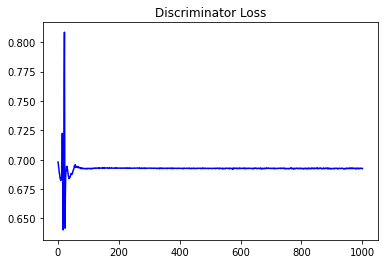

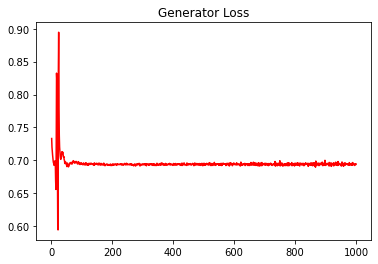

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22632441397667669


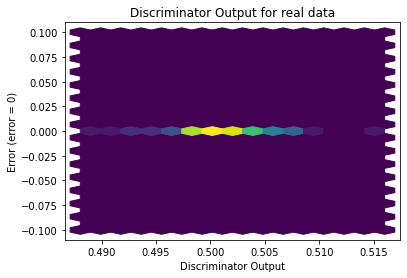

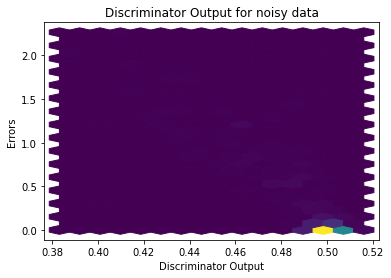

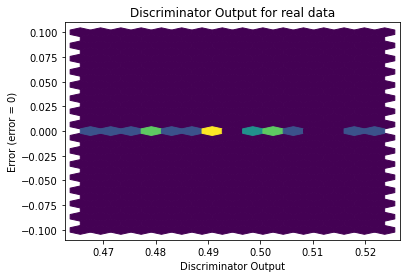

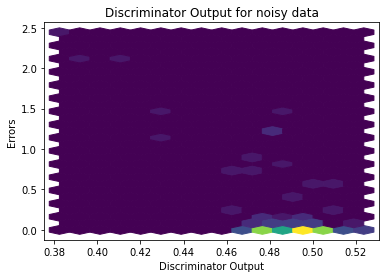

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


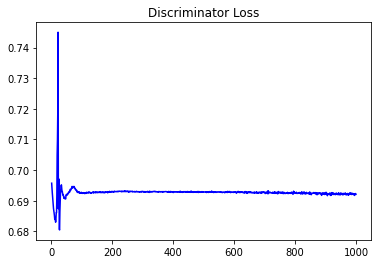

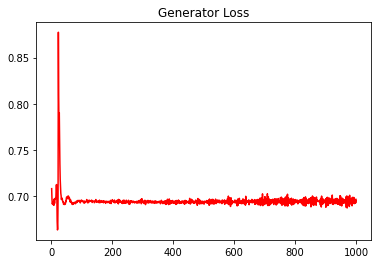

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21986665364465327


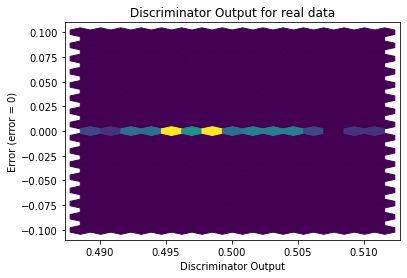

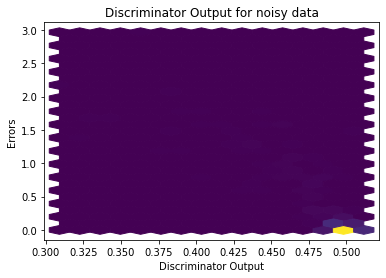

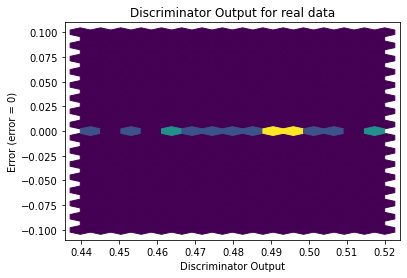

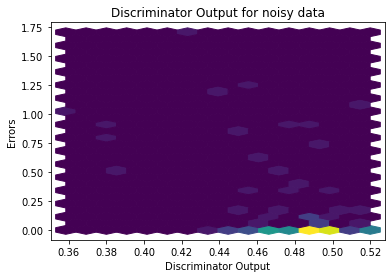

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5278]], requires_grad=True)
